In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font='monospace')

In [3]:
df = pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [4]:
def plot_single_variable(data, var, color):
    q1, q3 = data[var].quantile(0.25), data[var].quantile(0.75)
    iqr = q3 - q1
    data_wo_outliers = data[(data[var] >= q1 - 1.5*iqr) & (data[var] <= q3 + 1.5*iqr)]
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    axes.ravel()[0].set_title('W/ Outliers')
    axes.ravel()[1].set_title('W/O Outliers')
  
    sns.histplot(data=data, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 0])
    sns.histplot(data=data_wo_outliers, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 1])
    sns.violinplot(data=data, x=var, color=color, alpha=0.7, ax=axes[1, 0])
    sns.violinplot(data=data_wo_outliers, x=var, color=color, alpha=0.7, ax=axes[1, 1])
    sns.boxplot(data=data, x=var, orient='h', flierprops={'marker': 'd', 'alpha': 0.5}, color=color, ax=axes[2, 0])
    sns.boxplot(data=data_wo_outliers, x=var, orient='h', flierprops={'marker': 'd', 'alpha': 0.5}, color=color, ax=axes[2, 1])

## Single Variable Distributions (Existing Features)

---

### **Variables**: `wins` and `losses`

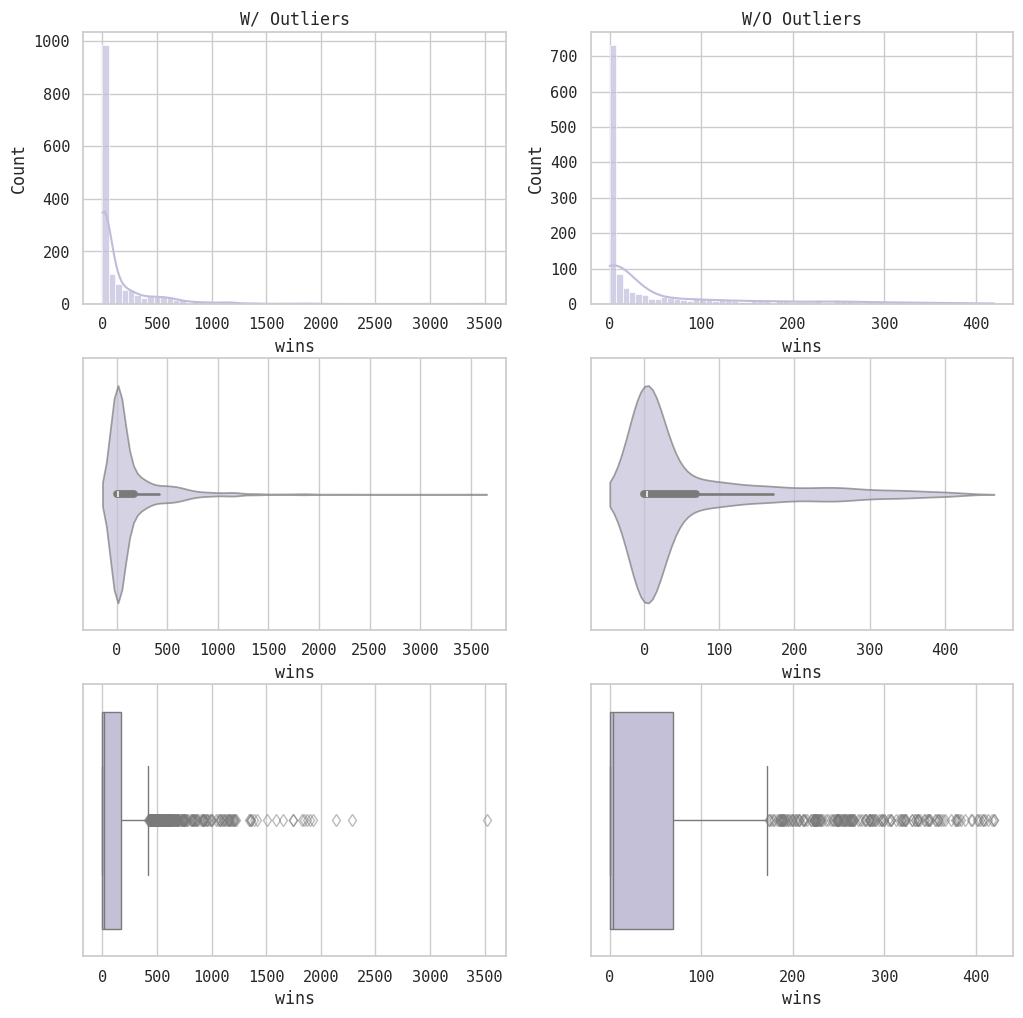

In [5]:
plot_single_variable(data=df, var='wins', color='#c0bcdc')

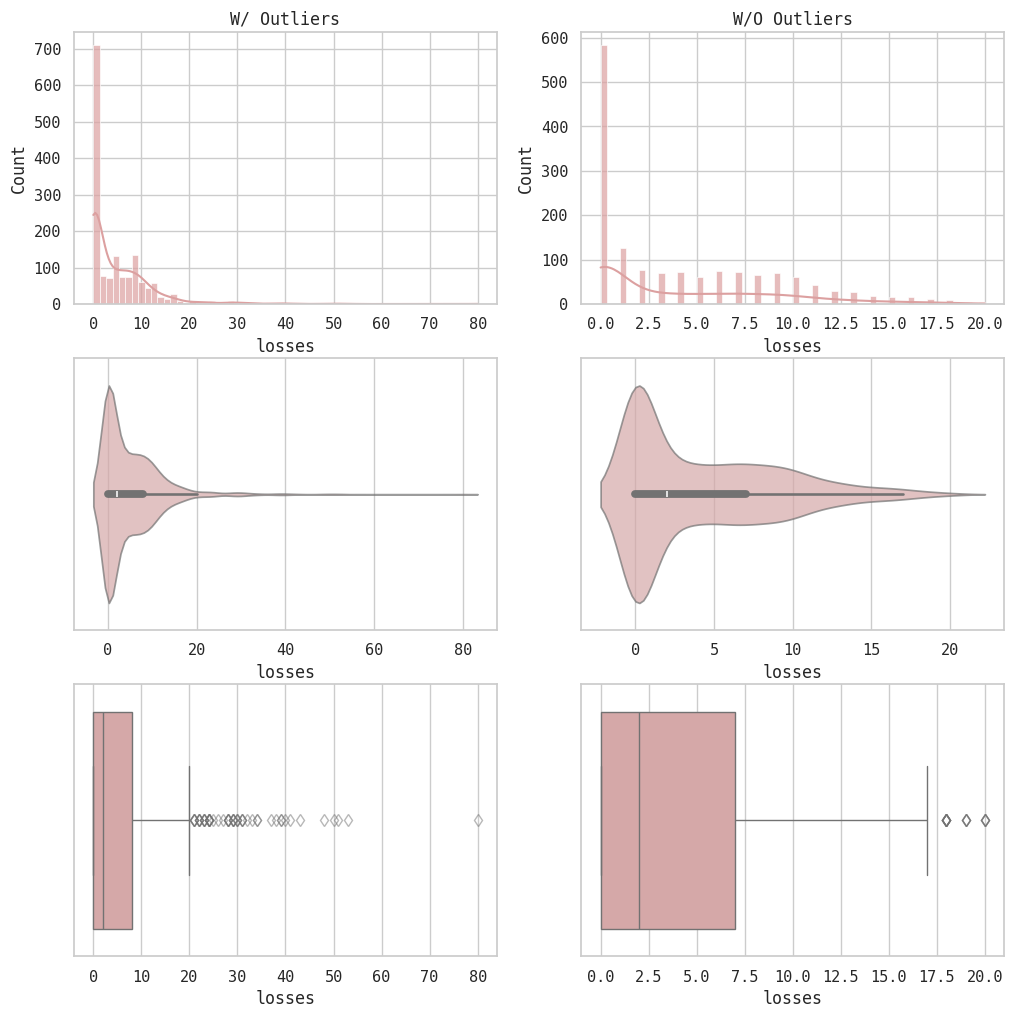

In [6]:
plot_single_variable(data=df, var='losses', color='#dca0a0')

### **Variables**: `kills`, `deaths`, `assists`, `kdRatio`, `scorePerMinute` and `killStreak`

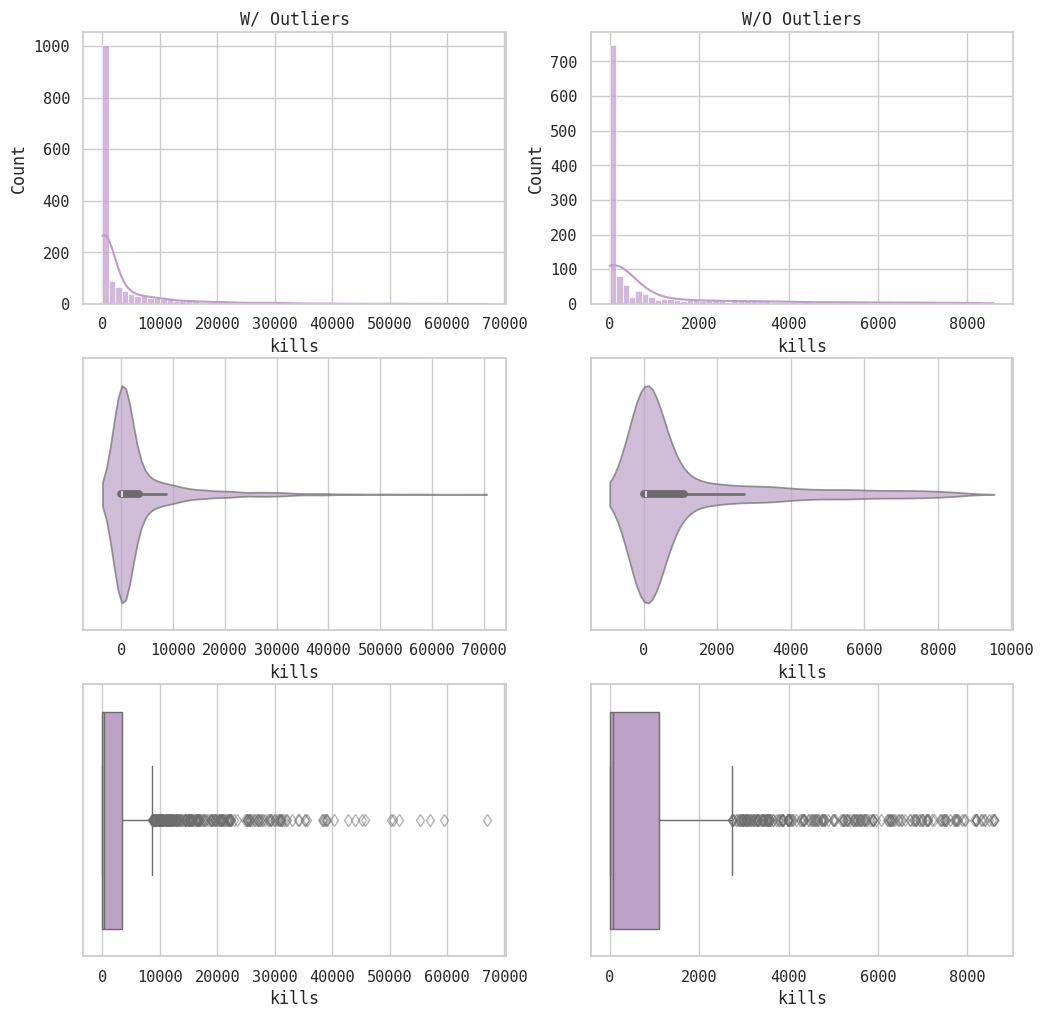

In [7]:
plot_single_variable(data=df, var='kills', color='#c09ccc')

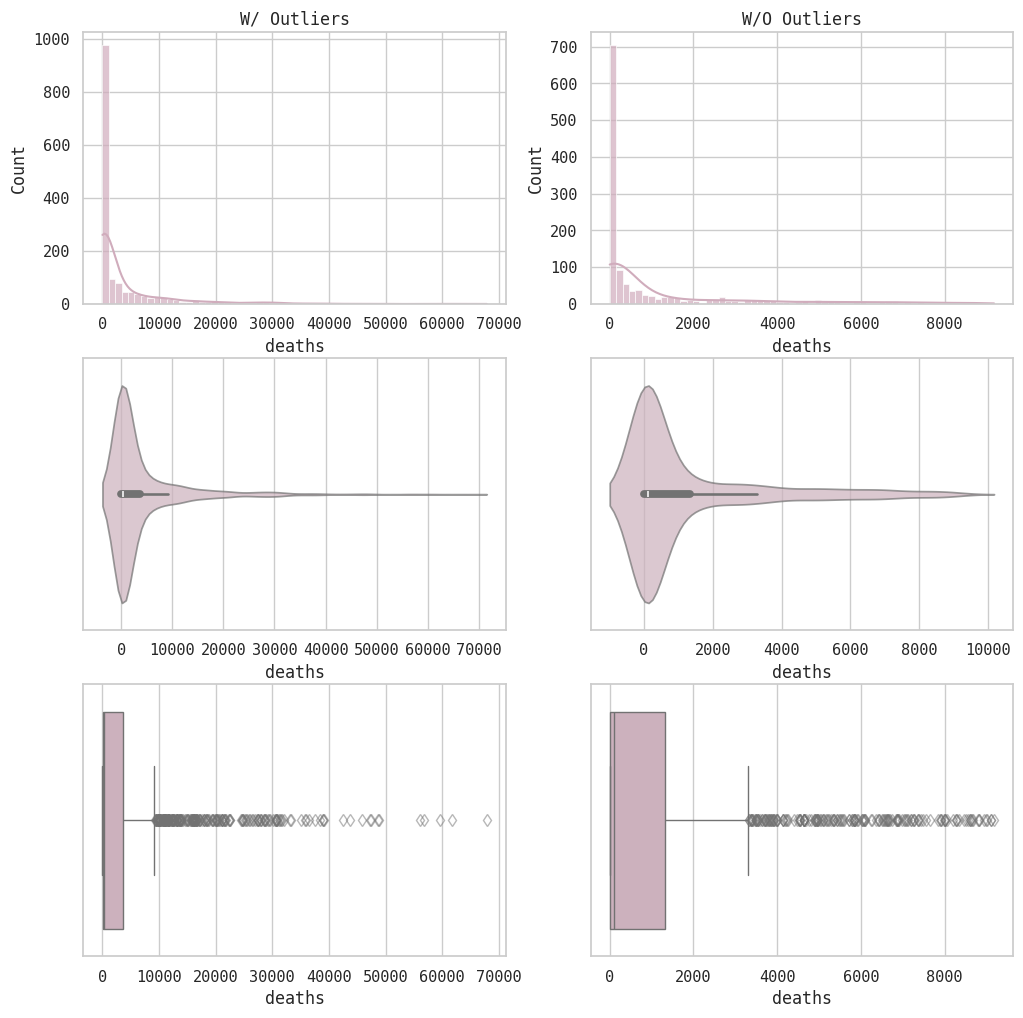

In [8]:
plot_single_variable(data=df, var='deaths', color='#d0acbc')

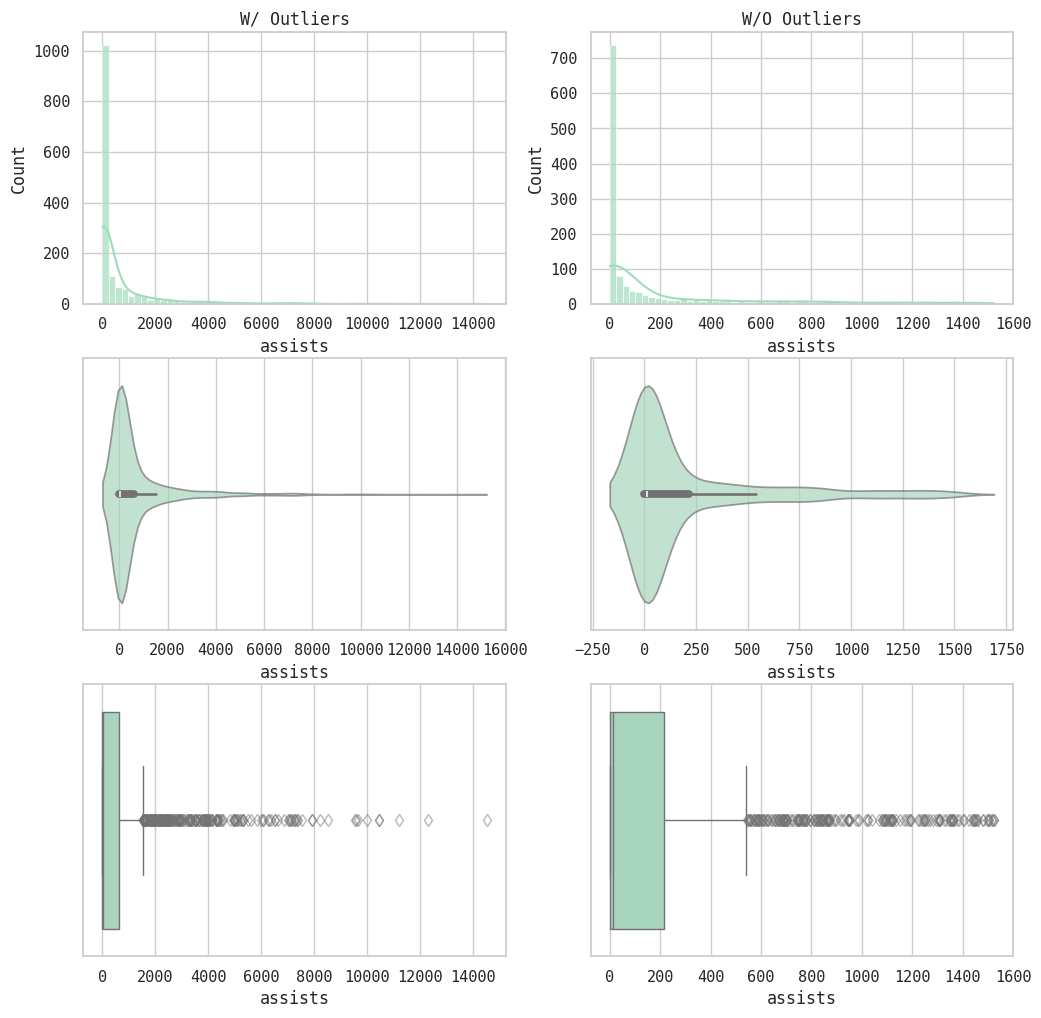

In [9]:
plot_single_variable(data=df, var='assists', color='#a0dcbc')

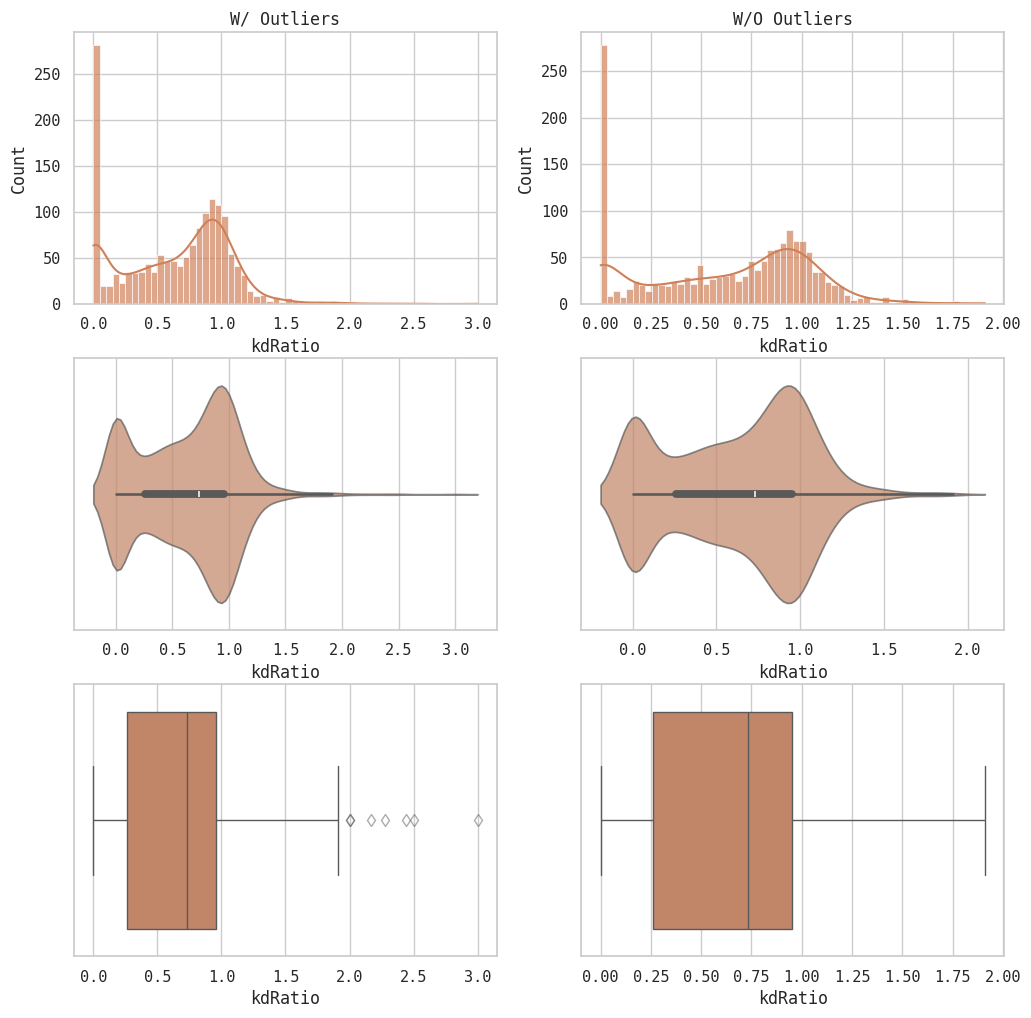

In [10]:
plot_single_variable(data=df, var='kdRatio', color='#d08058')

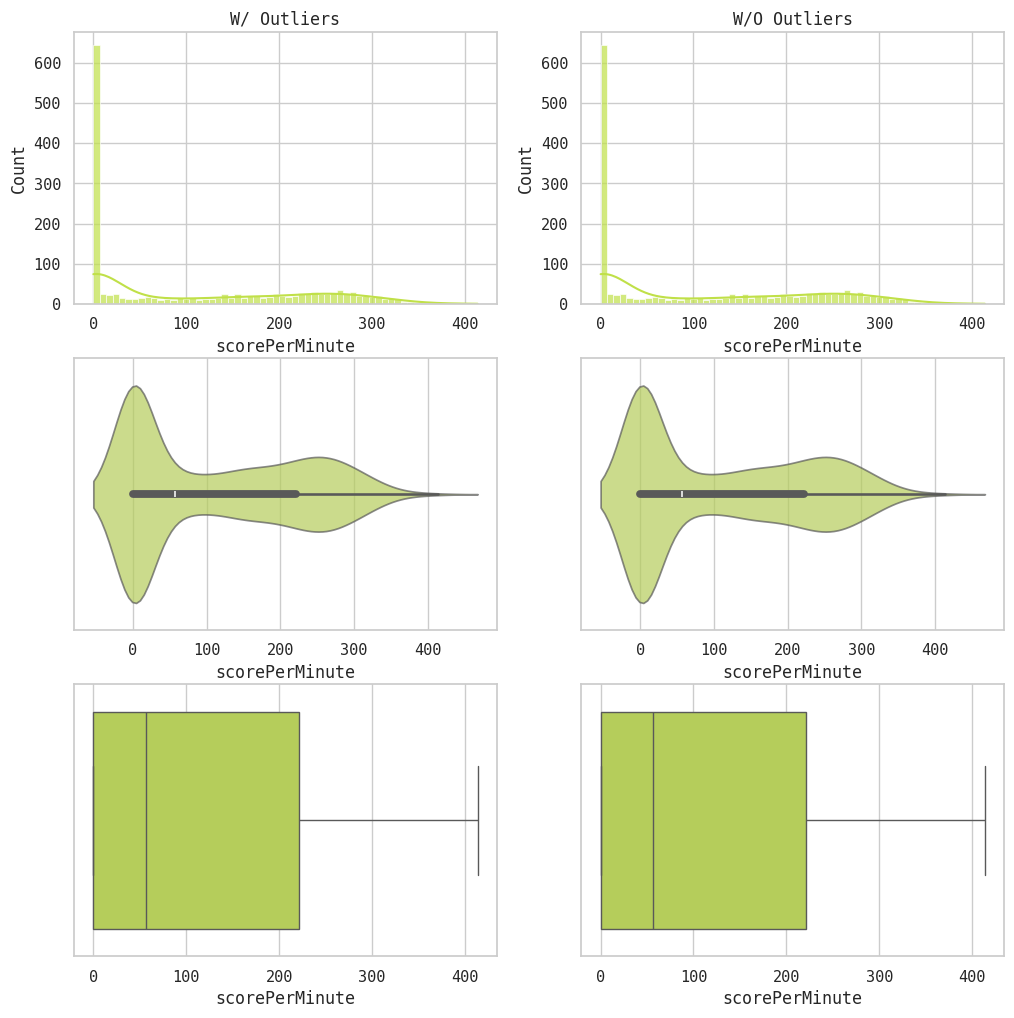

In [11]:
plot_single_variable(data=df, var='scorePerMinute', color='#c0e048')

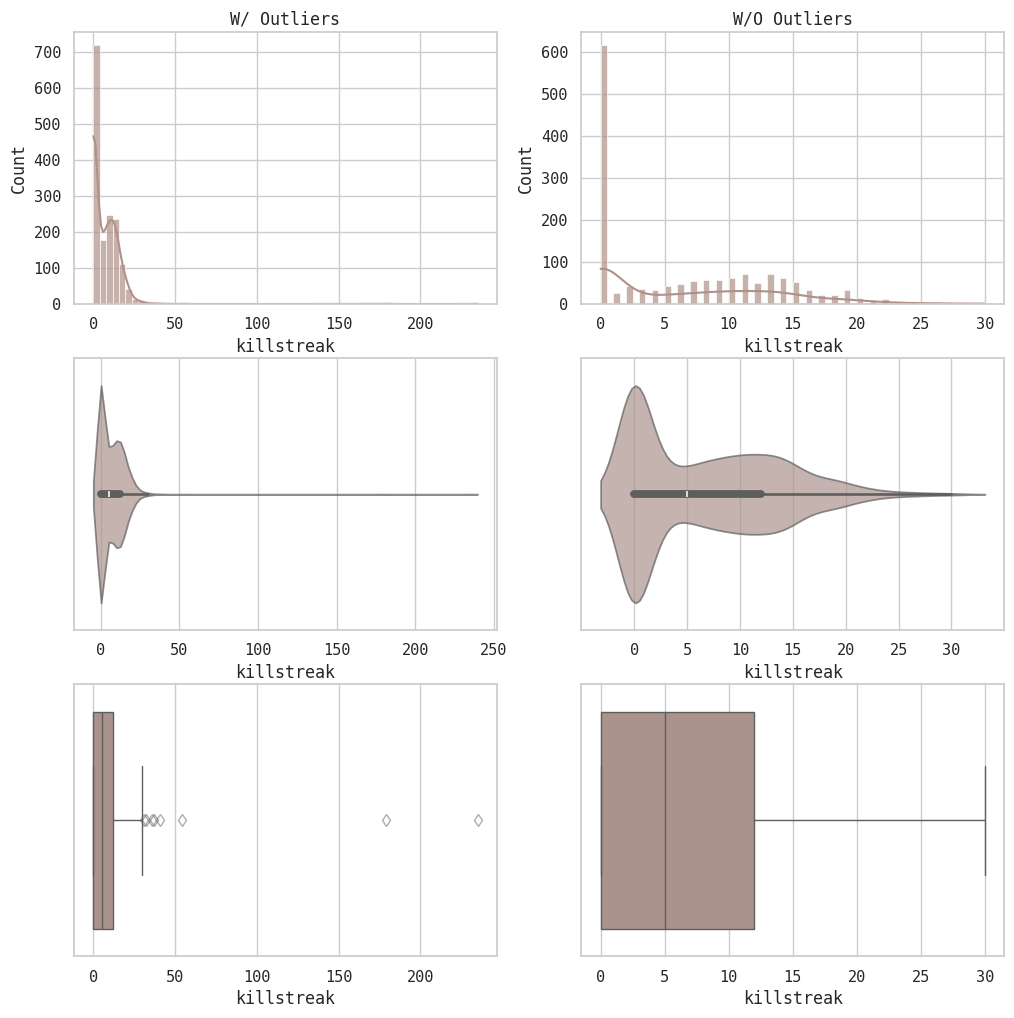

In [12]:
plot_single_variable(data=df, var='killstreak', color='#b09088')

### **Variables**: `level`, `prestige`, and `xp`

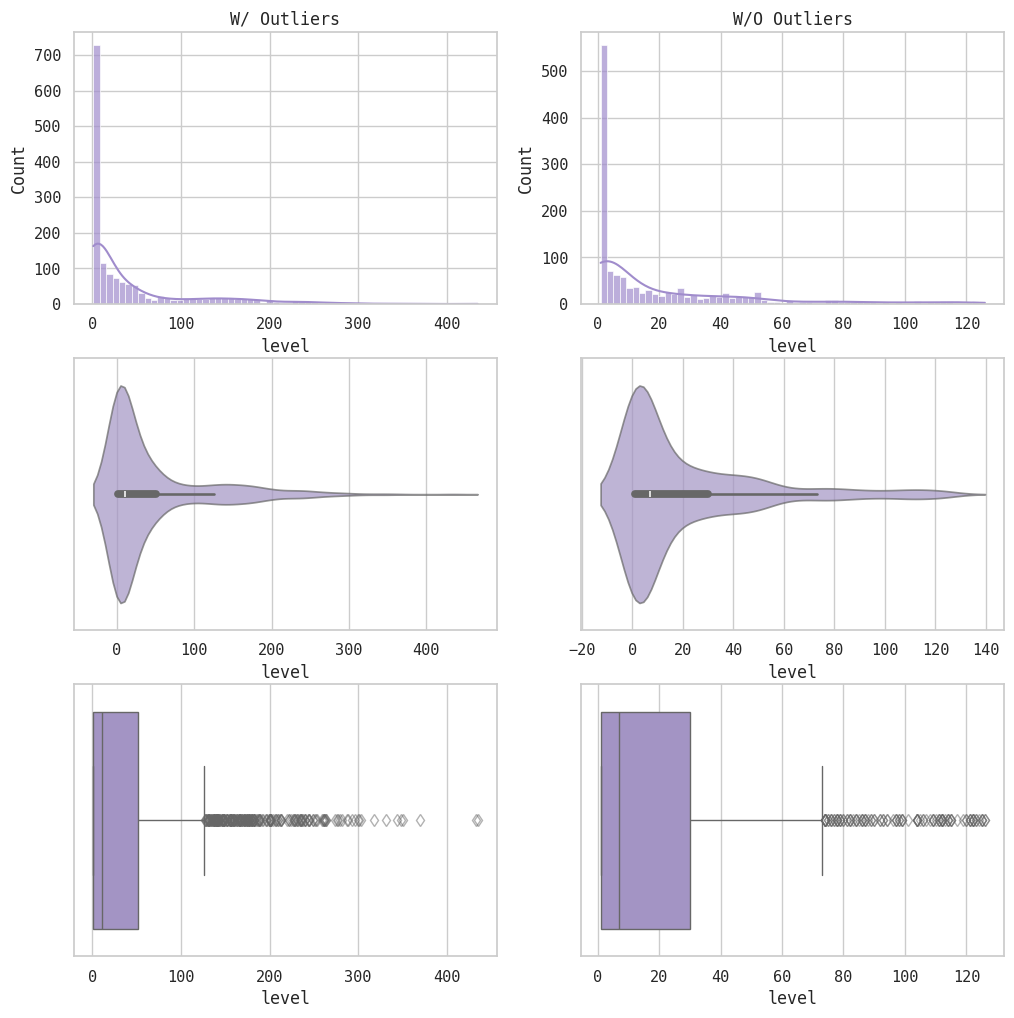

In [13]:
plot_single_variable(data=df, var='level', color='#a08ccc')

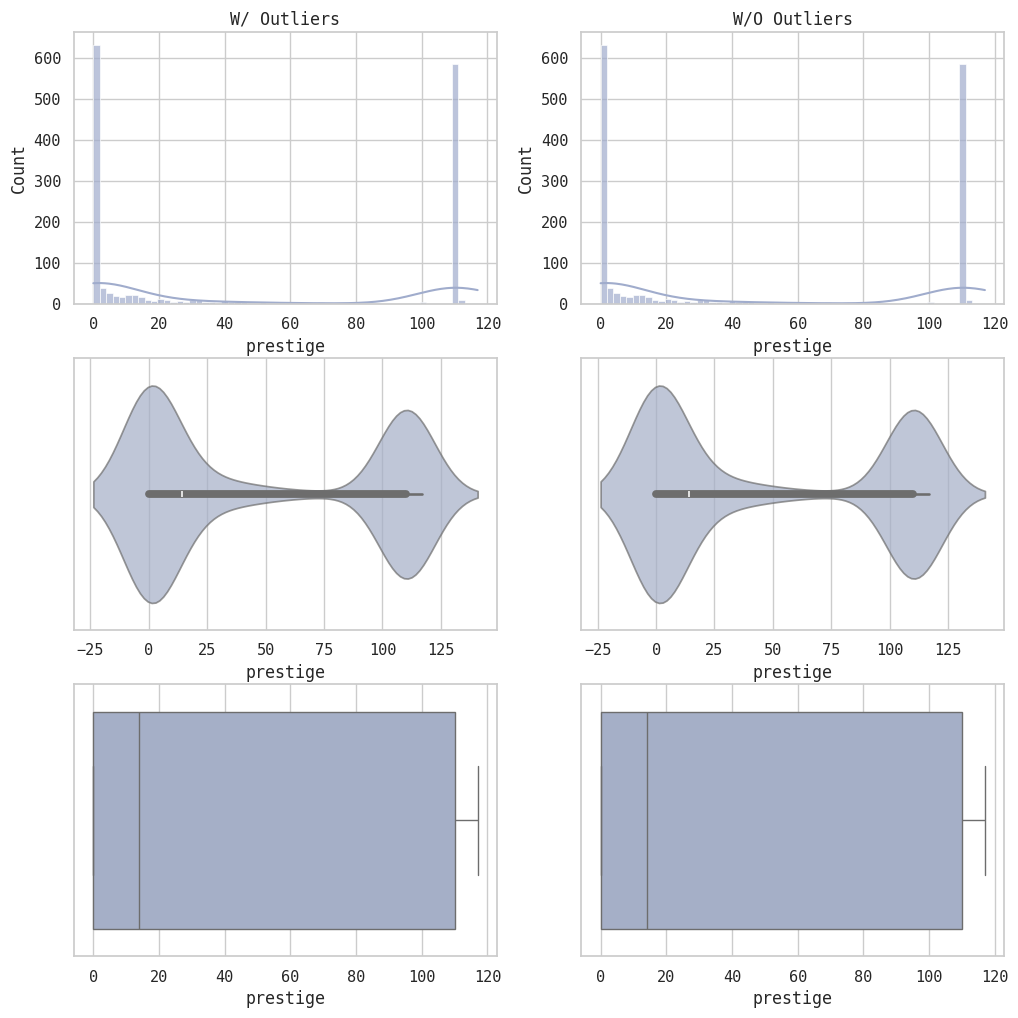

In [14]:
plot_single_variable(data=df, var='prestige', color='#a0accc')

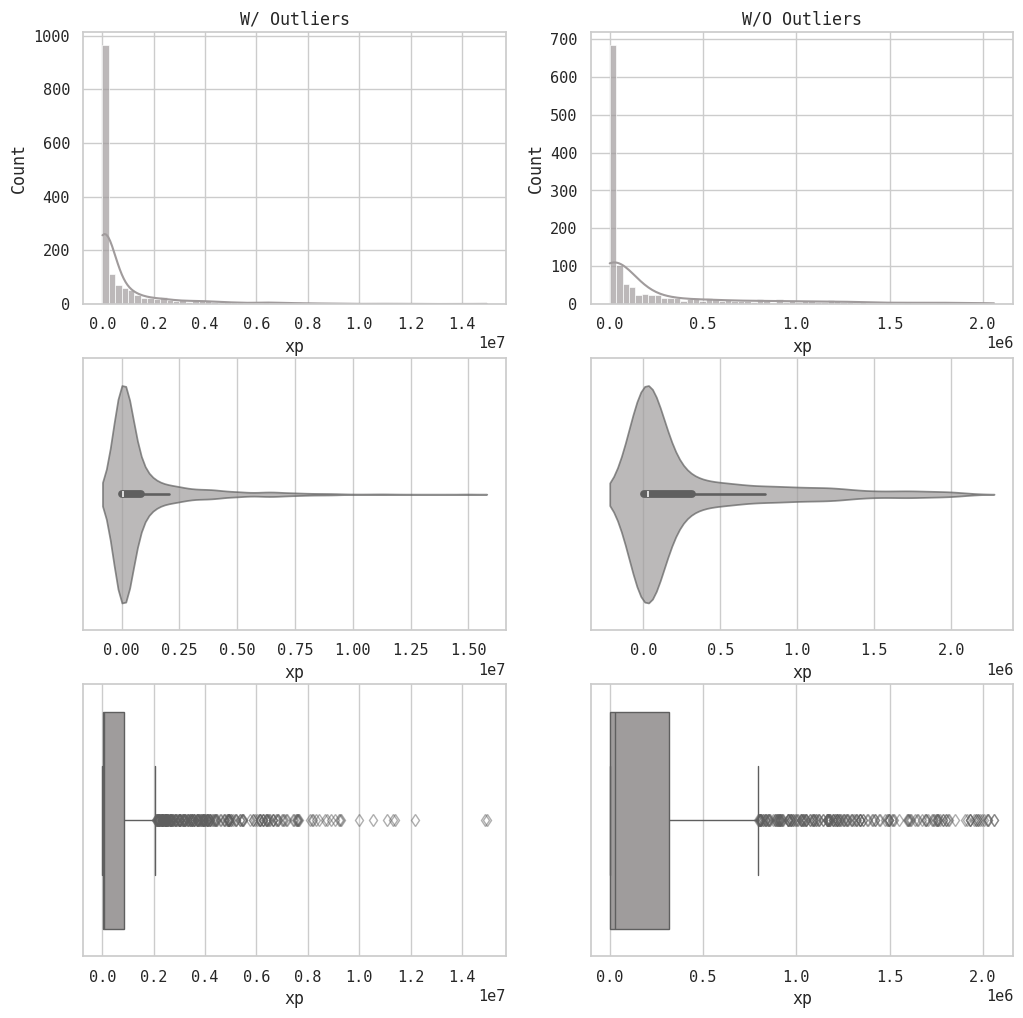

In [15]:
plot_single_variable(data=df, var='xp', color='#a09b9c')

### **Variables**: `hits`, `misses`, `headshots` and `shots`

> Note that `shots` is the sum of `hits` and `misses`.

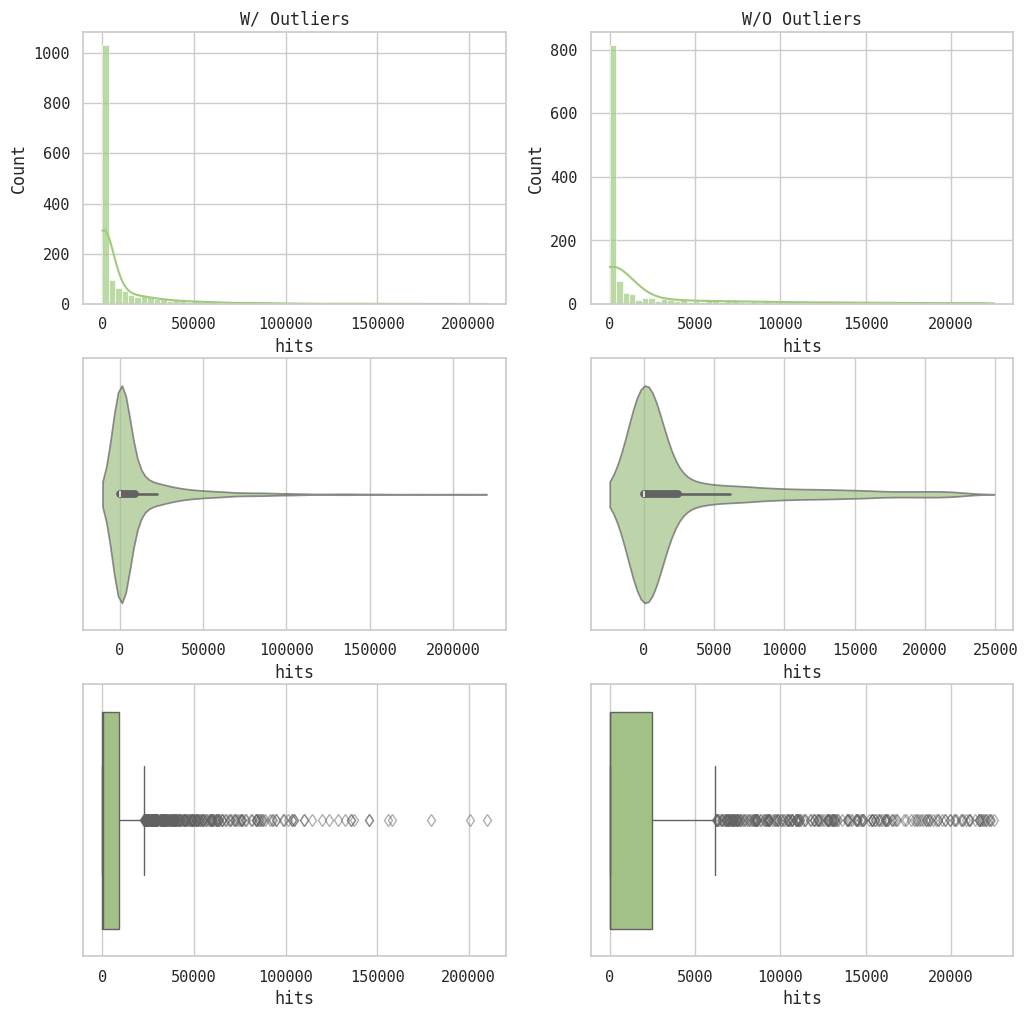

In [16]:
plot_single_variable(data=df, var='hits', color='#a0cb7c')

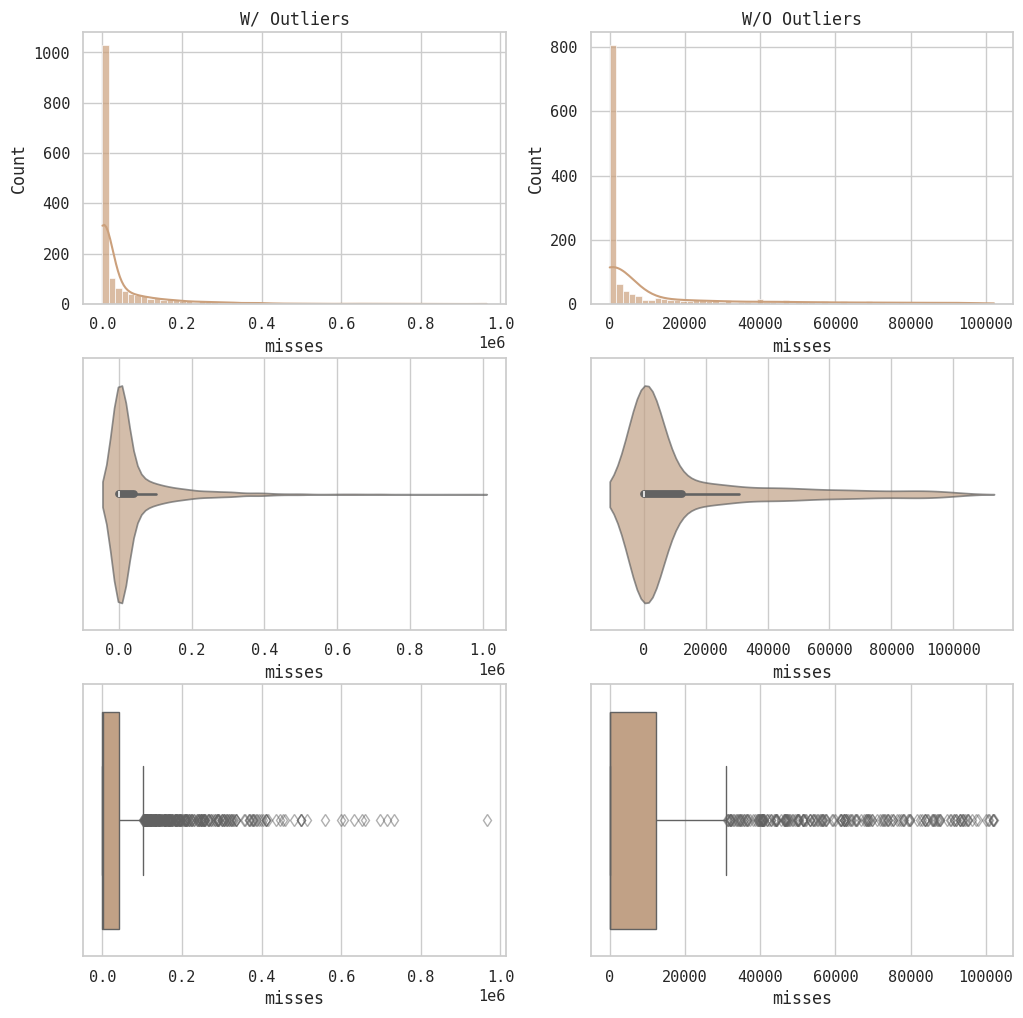

In [17]:
plot_single_variable(data=df, var='misses', color='#cba07c')

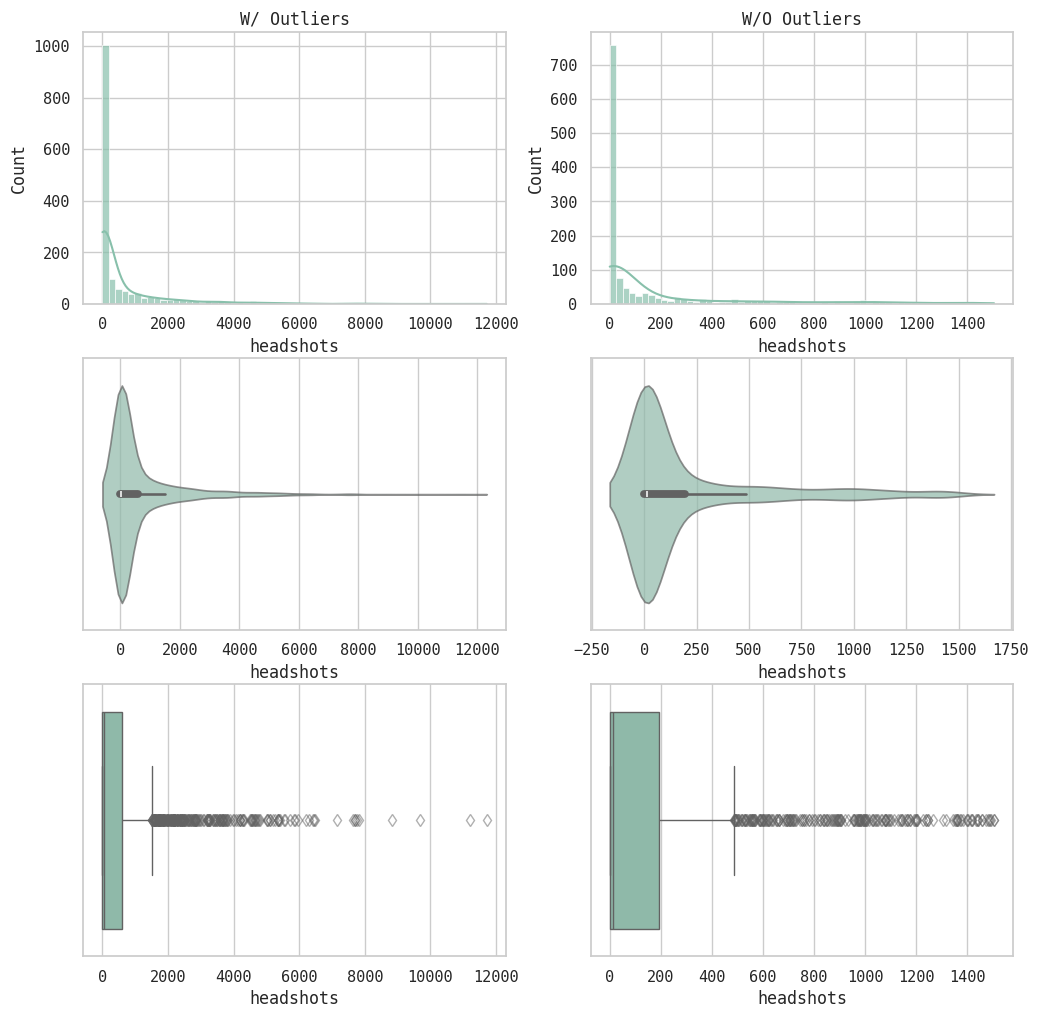

In [18]:
plot_single_variable(data=df, var='headshots', color='#88c0ab')

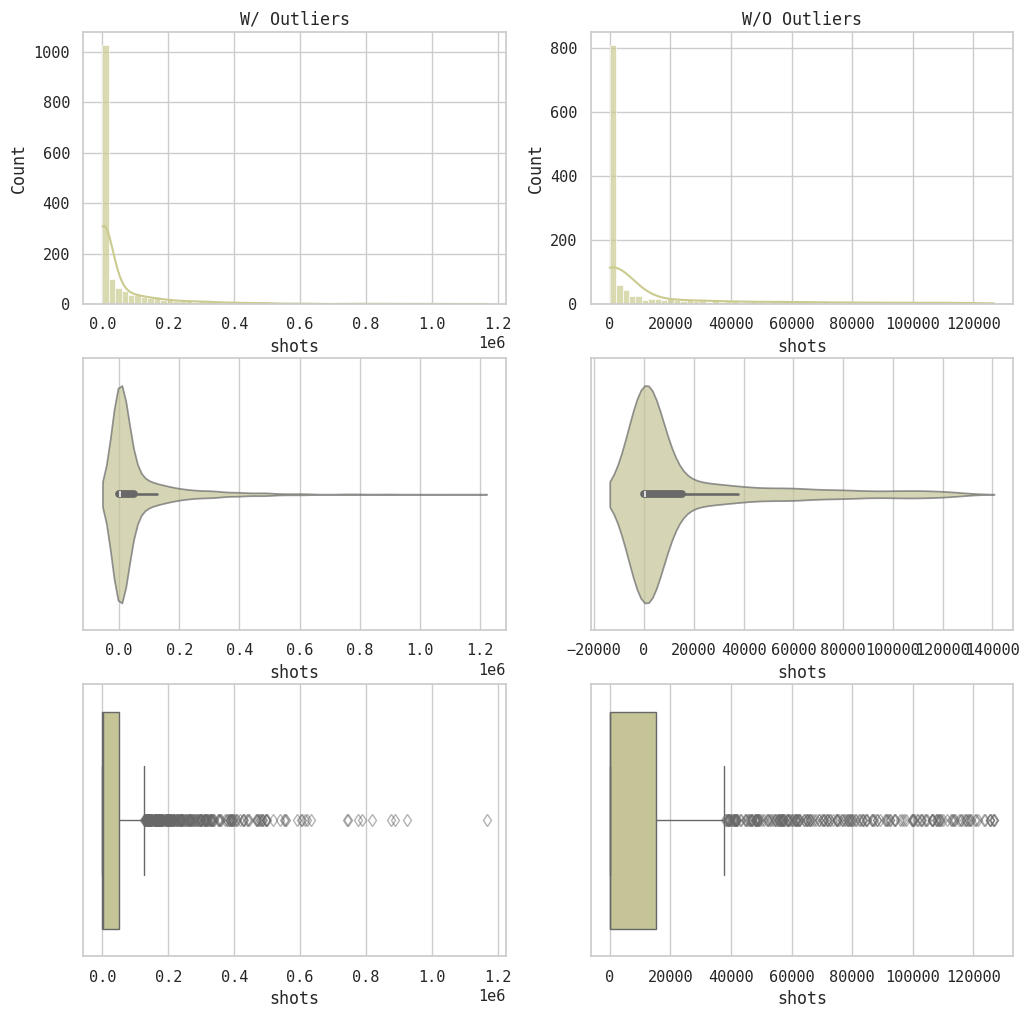

In [19]:
plot_single_variable(data=df, var='shots', color='#cbcb90')

### **Variables**: `timePlayed`, `averageTime`, and `gamesPlayed`

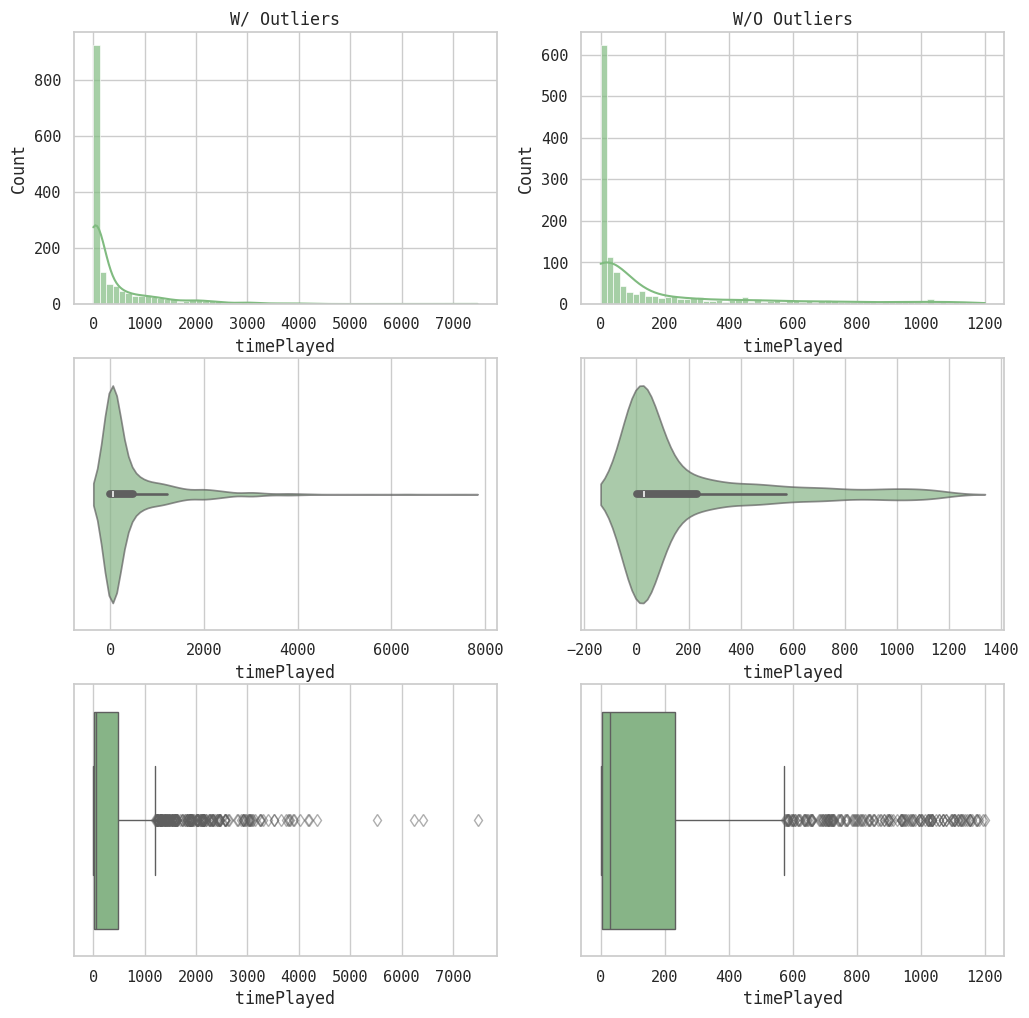

In [20]:
plot_single_variable(data=df, var='timePlayed', color='#80bb80')

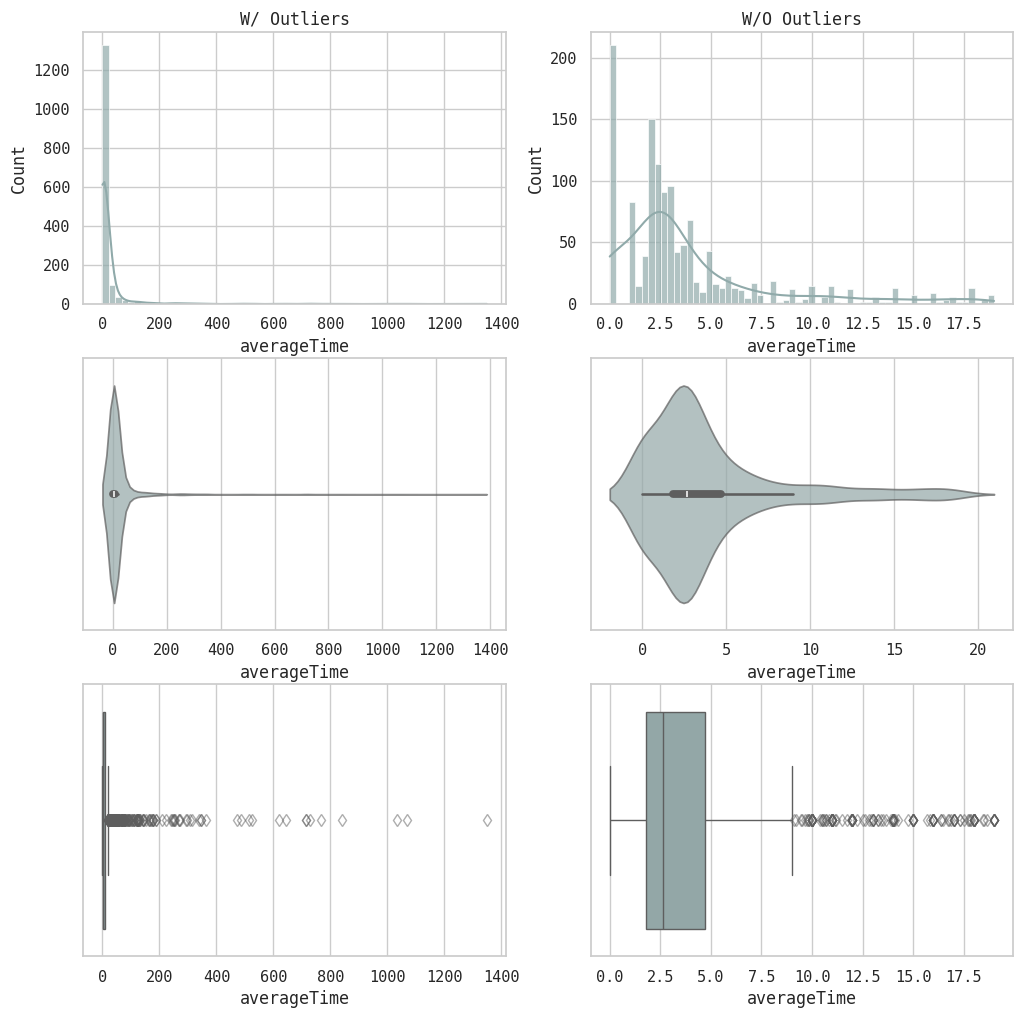

In [21]:
plot_single_variable(data=df, var='averageTime', color='#90aaaa')

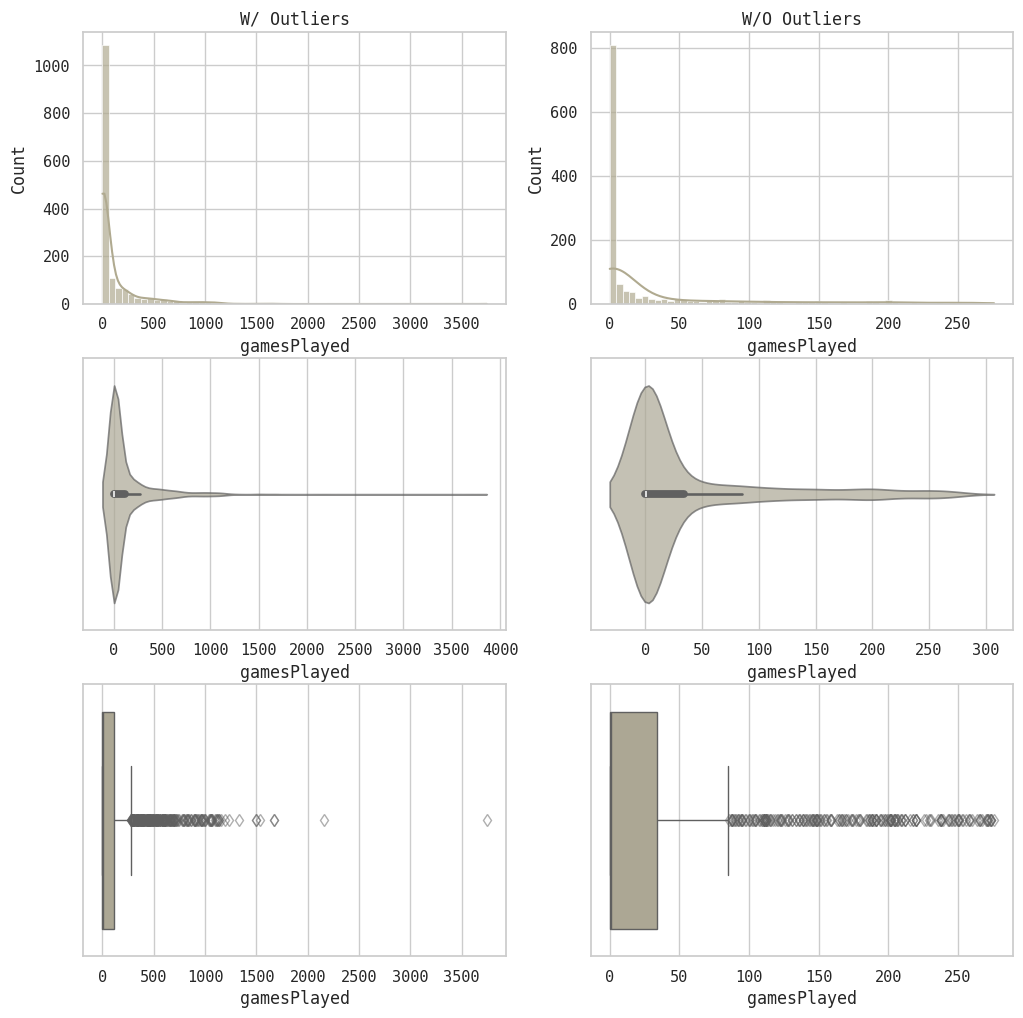

In [22]:
plot_single_variable(data=df, var='gamesPlayed', color='#b0aa90')

## Single Variable Distributions (Engineered Features)

---

### Definitions

- `winRate`: `wins` / (`wins` + `loses`)
- `killsPerGame` : `kills` / `gamesPlayed`
- `deathsPerGame` : `deaths` / `gamesPlayed`
- `assistsPerGame` : `assists` / `gamesPlayed`
- `hitRate`: `hits` / `shots`
- `headshotRate` : `headshots` / `shots`

In [5]:
df['winRate']        = df['wins'] / (df['wins'] + df['losses'])
df['killsPerGame']   = df['kills'] / df['gamesPlayed']
df['deathsPerGame']  = df['deaths'] / df['gamesPlayed']
df['assistsPerGame'] = df['assists'] / df['gamesPlayed']
df['hitRate']        = df['hits'] / df['shots']
df['headshotRate']   = df['headshots'] / df['shots']
df.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

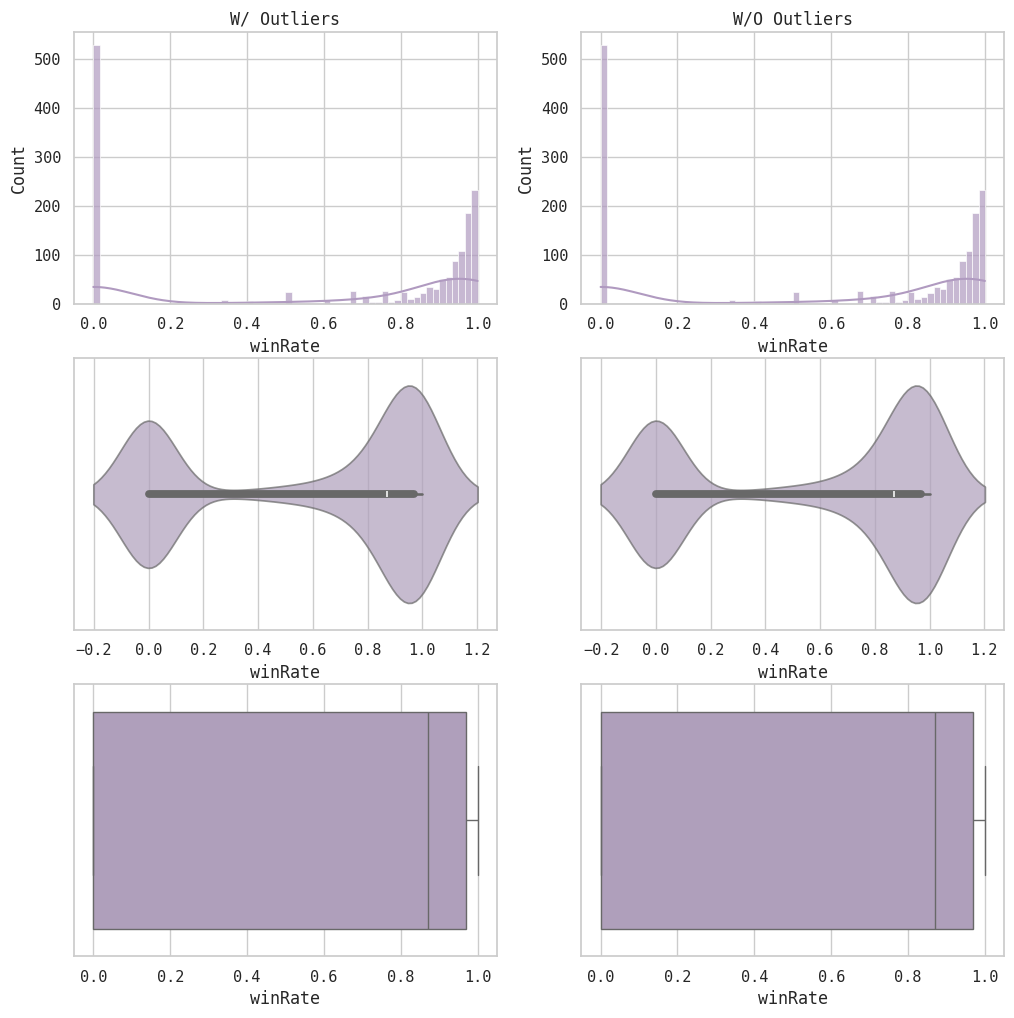

In [24]:
plot_single_variable(data=df, var='winRate', color='#b09ac0')

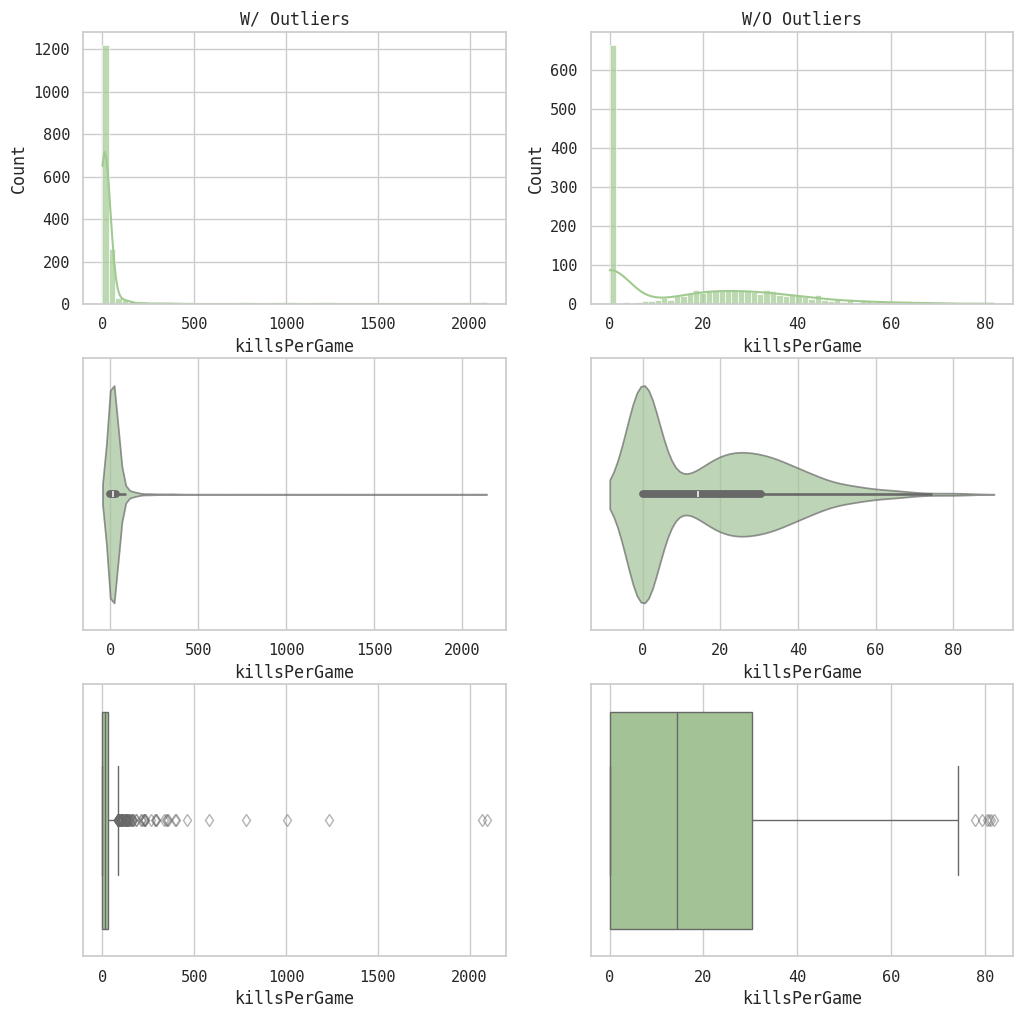

In [25]:
plot_single_variable(data=df, var='killsPerGame', color='#a0ca90')

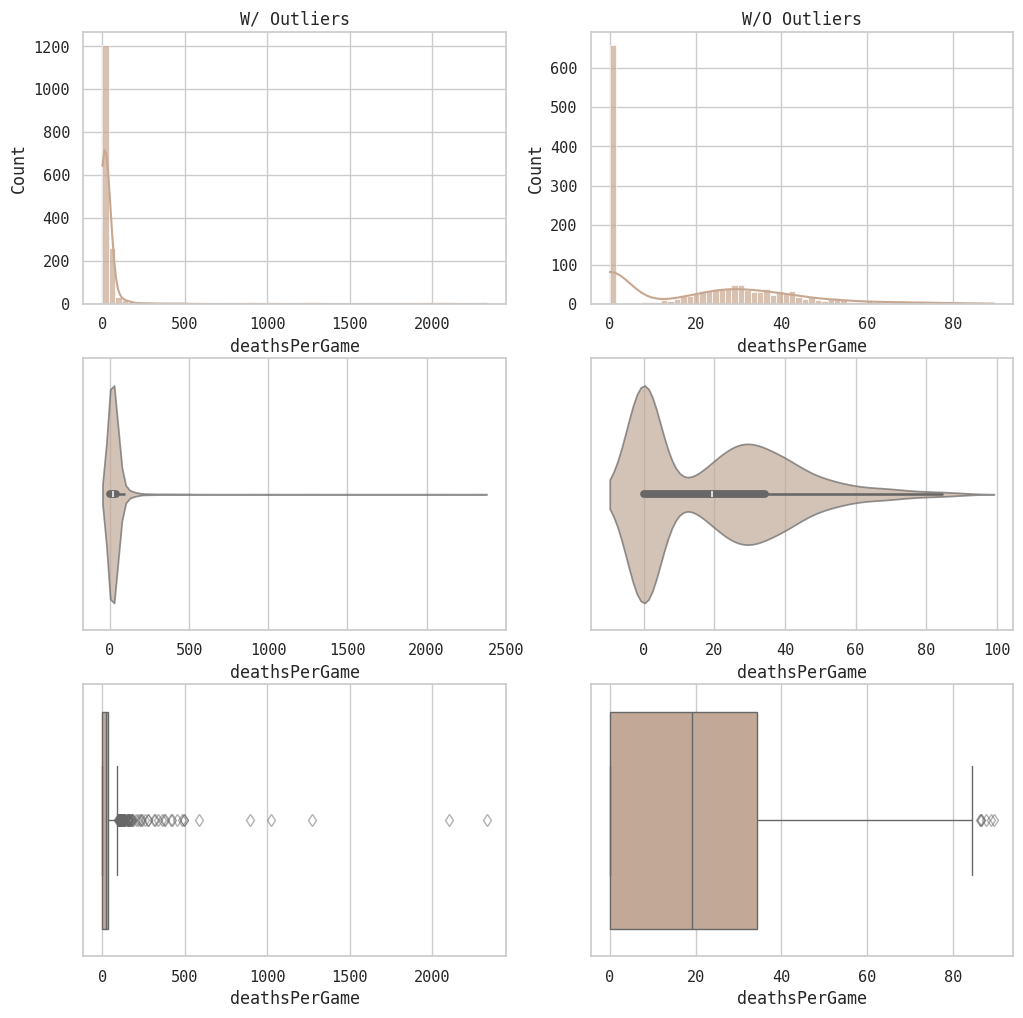

In [26]:
plot_single_variable(data=df, var='deathsPerGame', color='#c8a790')

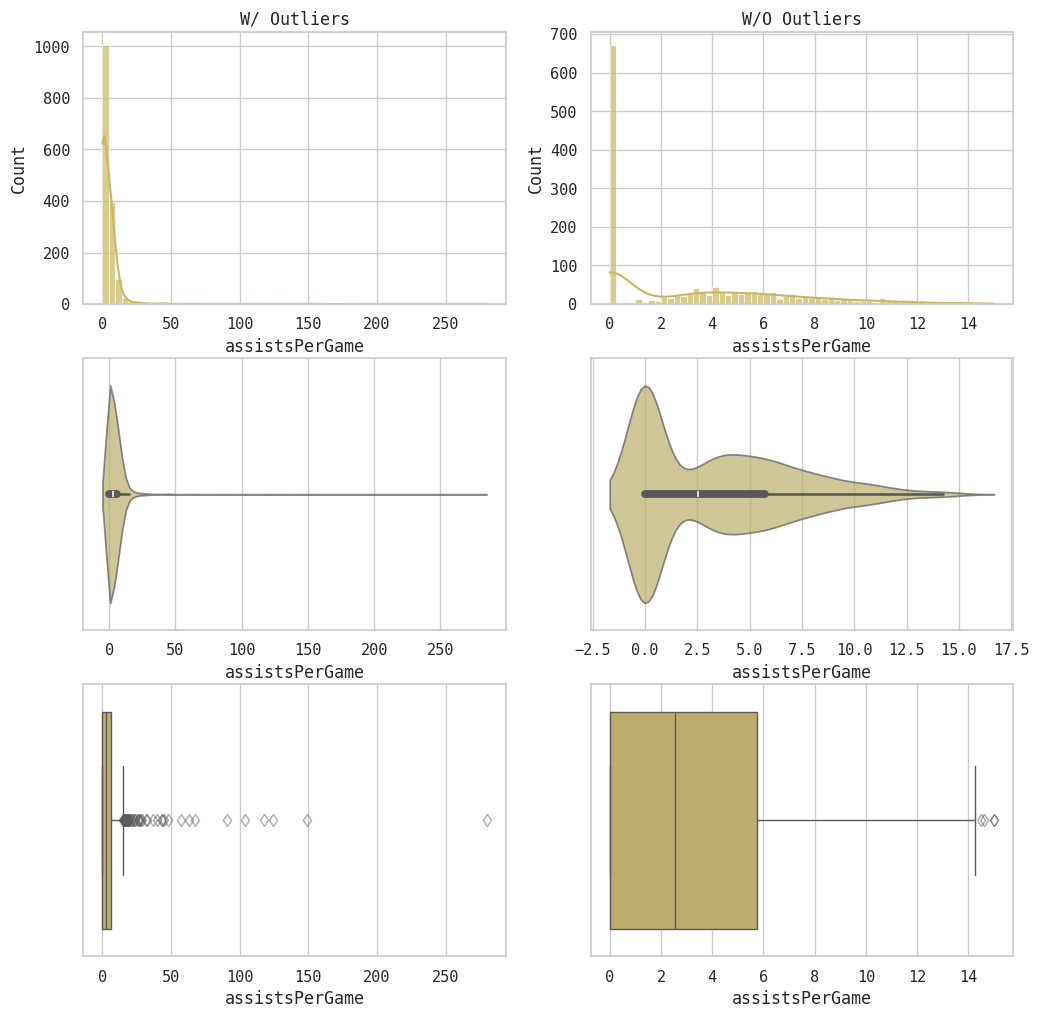

In [27]:
plot_single_variable(data=df, var='assistsPerGame', color='#c8b760')

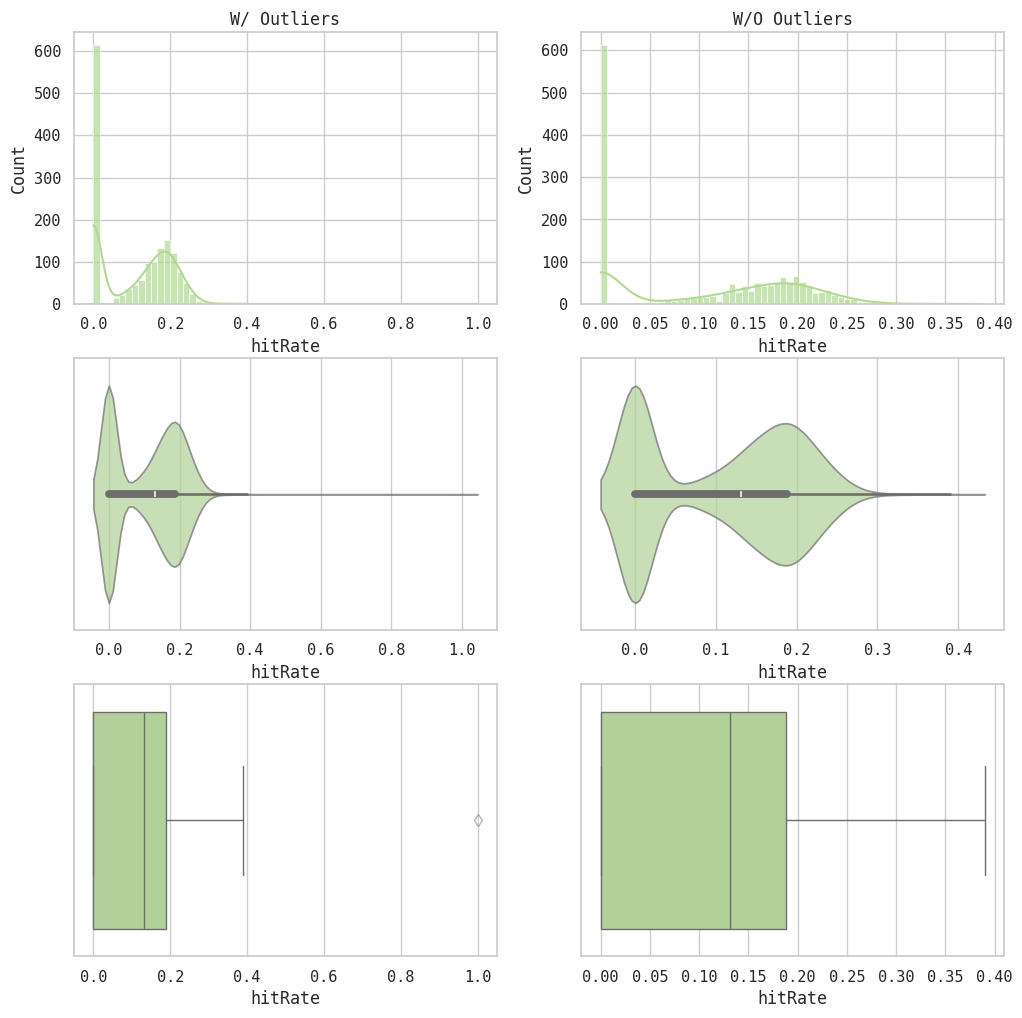

In [28]:
plot_single_variable(data=df, var='hitRate', color='#b0da90')

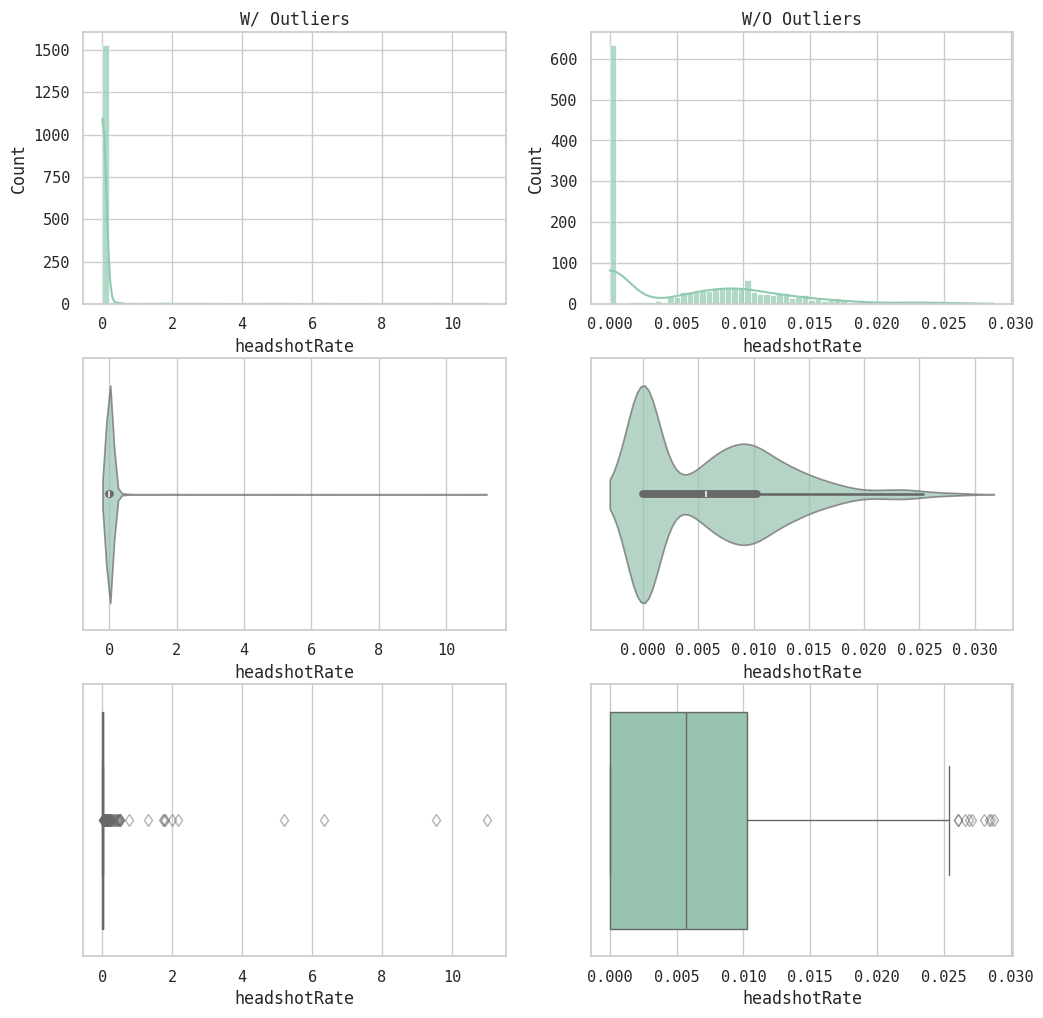

In [29]:
plot_single_variable(data=df, var='headshotRate', color='#90cab0')

## Investigating pecularities in the distributions of `kdRatio` and `winRate`.

---

Good measures of player skill include the `kdRatio` and `winRate`. However, a glance at the distributions plotted earlier
reveal quirks in the dataset. Notice that there's a surprisingly large number of players with close to zero `kdRatio`. In the same vein,
there are two "humps" in the distribution of `winRate`, one centered at zero and the other centered at one.

In [30]:
def plot_dual_variable_jointplot(data, var_x, var_y, color):
    data_wo_outliers = data.copy()
    for var in [var_x, var_y]:
        q1, q3 = data[var].quantile(0.25), data[var].quantile(0.75)
        iqr = q3 - q1
        data_wo_outliers = data_wo_outliers[(data[var] >= q1 - 1.5*iqr) & (data[var] <= q3 + 1.5*iqr)]
    
    p = sns.jointplot(data=data, x=var_x, y=var_y, color=color, alpha=0.9, height=7, ratio=7, kind='hist')
    p.fig.suptitle('Jointplot (W/ Outliers')
    p.fig.tight_layout()

    p = sns.jointplot(data=data_wo_outliers, x=var_x, y=var_y, color=color, alpha=0.9, height=8, ratio=7, kind='hist')
    p.fig.suptitle('Jointplot (W/O Outliers')
    p.fig.tight_layout()

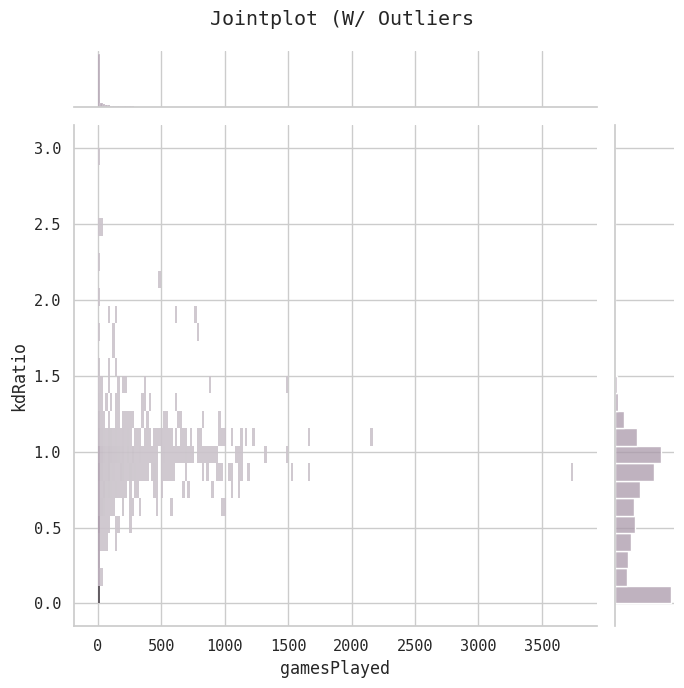

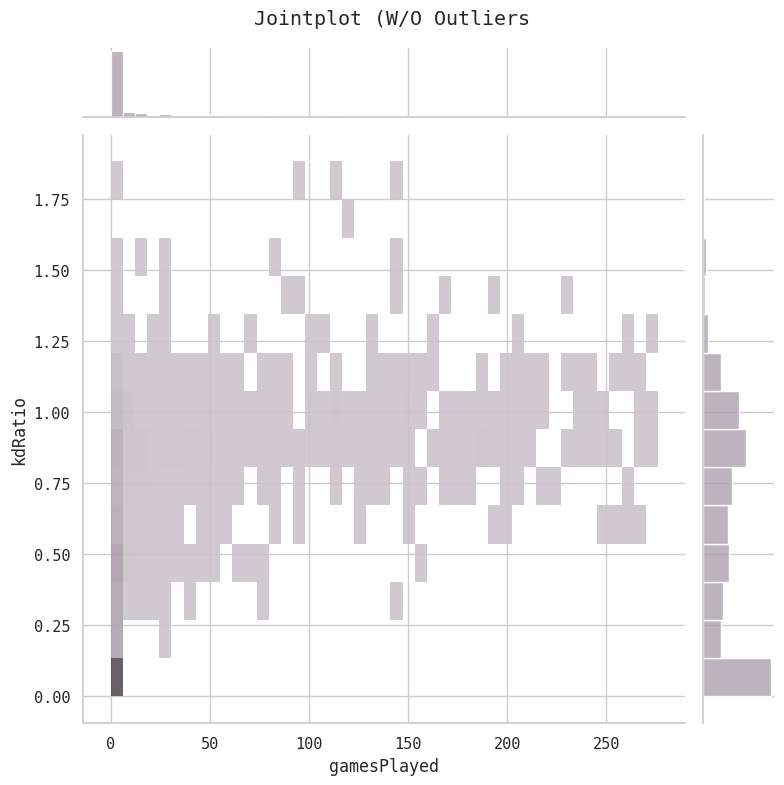

In [31]:
plot_dual_variable_jointplot(data=df, var_x='gamesPlayed', var_y='kdRatio', color='#aa99aa')

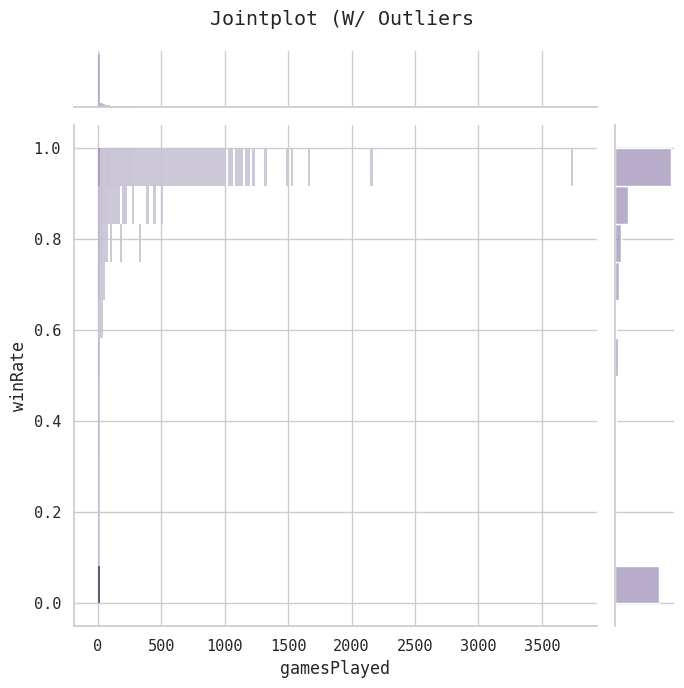

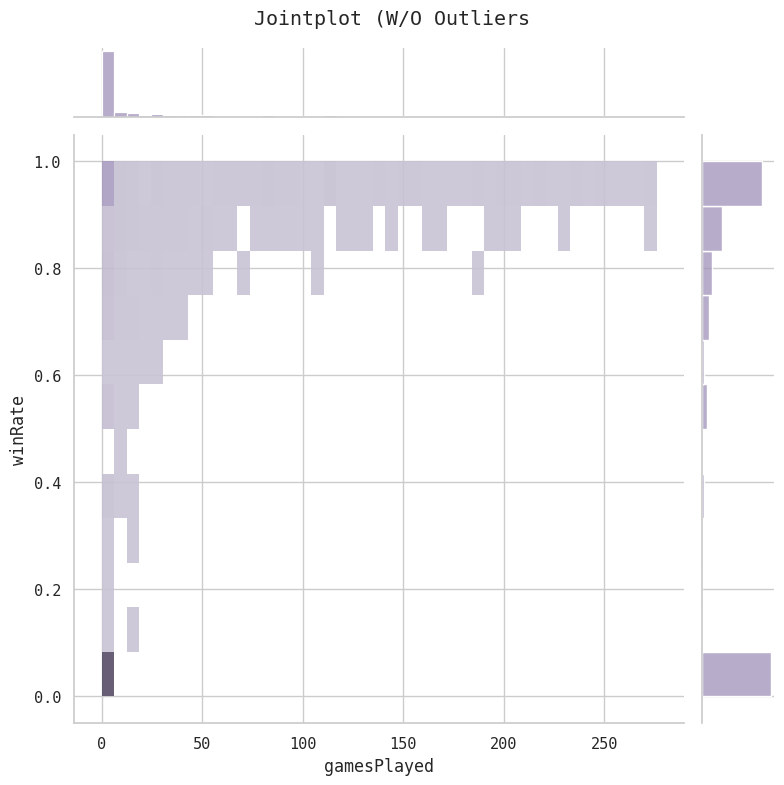

In [32]:
plot_dual_variable_jointplot(data=df, var_x='gamesPlayed', var_y='winRate', color='#a091ba')

> The jointplots reveal a sizable proportion of the playerbase with close to zero games played. Among them, a significant
> number of players have an almost zero `kdRatio`, likely attributed to their inexperience with the game's mechanics. This same
> phenomenon is present in `winRate`, although the darker blot at the top left corner suggests that many newcomers have a `winRate`
> of one not because they are necessarily better, but because they won the one/two game(s) that they have played thus far. We believe
> that a more accurate measure of performance integrates both `gamesPlayed` and `kdRatio`/`winRate`, i.e., a `winRate` near one
> maintained over a large number of games is more impressive than a similar `winRate` calculated from a couple games. To that end,
> we shall engineer two new features:
>
> - `kdRatioAlt` : `kdRatio` * ln(`gamesPlayed`)
> - `winRateAlt` : `winRate` * ln(`gamesPlayed`)
>
> Because we feel that a player with a `winRate` of $0.7$ and $500$ games played is not necesarily five times better than
> another player with a similar `winRate` but only $100$ games played, we apply the logarithm function on `gamesPlayed` to tone down
> its impact on our newly engineered features.

In [6]:
df['winRateAlt'] = df['winRate'] * np.log(df['gamesPlayed'])
df['kdRatioAlt'] = df['kdRatio'] * np.log(df['gamesPlayed'])
df.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

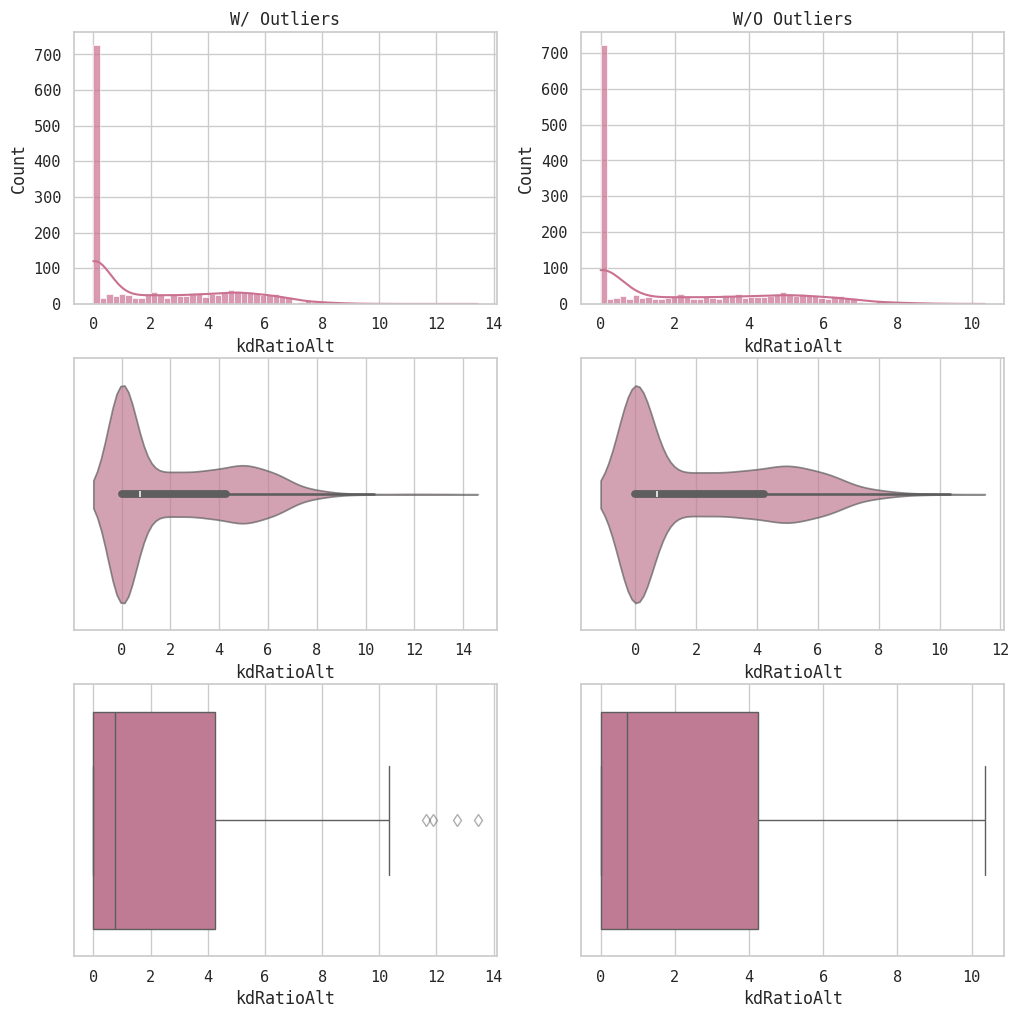

In [34]:
plot_single_variable(data=df, var='kdRatioAlt', color='#ca7090')

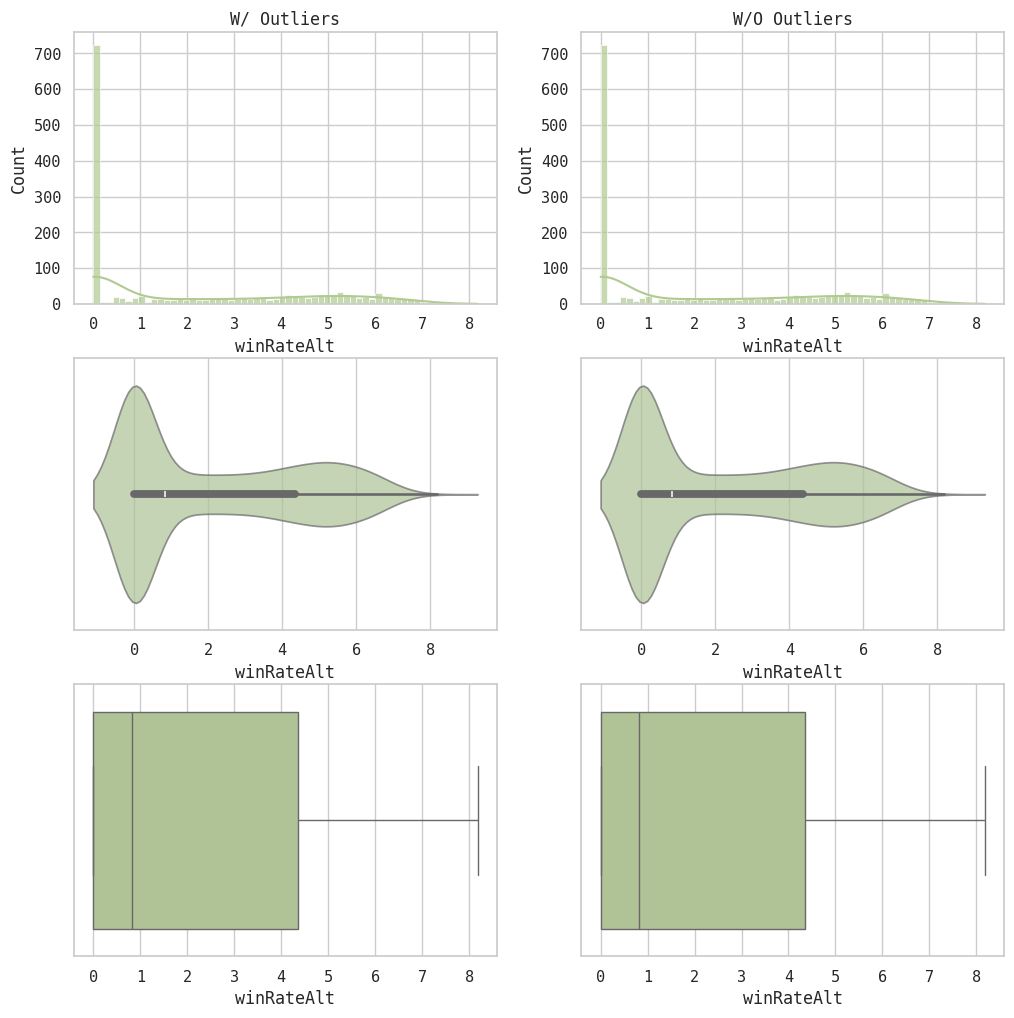

In [35]:
plot_single_variable(data=df, var='winRateAlt', color='#b0ca90')

## Outlier Removal

---

Now that we have identified our predictor and target variables, we'll remove the outliers as per the box-plot definition.
We will then construct a new DataFrame without these outliers and save it into another file that will be used for subsequent
analysis.

In [13]:
columns = [
    'level',
    'prestige',
    'xp', 
    'hitRate',
    'timePlayed',
    'averageTime',
    'gamesPlayed',
    'headshotRate',
    'assistsPerGame',
    'winRateAlt',
    'kdRatioAlt'
]
df_wo_outliers = df.copy()
for col in columns:
    q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q3 - q1
    df_wo_outliers = df_wo_outliers[(df[col] >= q1 - 1.5*iqr) & (df[col] <= q3 + 1.5*iqr)]
df_wo_outliers.to_csv('data_wo_outliers.csv')